# Du texte à la donnée. Démultiplication des potentialités de réception 

D’une épigramme récitée lors d’un banquet à son inscription sur un papyrus, sur un manus crit, imprimée sur du papier ou stockée sur un disque dur, l’épistémologie du texte et de ses possibles est totalement bouleversée.

Nous nous intéressons particulièrement à la transformation du texte en données, manipulables et interopérables. En ce sens, il nous est désormais permis de déformer l’*Anthologie* en en changeant l’apparence. Pour ce faire, nous présenterons, sur une interface *Web*, une visualisation des données présentes sur la plateforme *Anthologie grecque*, et ce, de plusieurs façons. En effet, nous pouvons visualiser des statistiques globales sur les épigrammes, mais également faire des liens entre celles-ci, ou même présenter l’état d’édition de la plateforme.
Ces données affichées ou représentées permetteront de voir l’*Anthologie* grecque dans sa globalité plutôt que de la lire et de concevoir plus facilement des liens que ce qu’il est possible de faire à partir du corpus au format livre. Cela redéfinit en quelque sorte le paradigme de lecture en une réception autre, visuelle, du corpus.

In [4]:
# Prérequis 

import json
import requests
import csv
import pandas as pd

## 1. Récupérer les données de l'API 

L'idéal serait de faire tourner ce script tous les jours afin que la page de données ci-dessous soit mise à jour de manière journalière. 

Il faut noter que l'API est paginée. Ces première commandes nous permettent de stocker, dans la liste ```data_from_API``` toutes les données présentes dans l'API, sous l'endpoint ```passages```.  

In [5]:
data_from_API = []
pagination = True
c = 0 
while pagination == True: 
    c = c+1
    param = {'page': c,}
    basic_url = 'https://anthologiagraeca.org/api/'
    endpoint = "passages"
    r = requests.get(basic_url + endpoint,param).json()
    if r['next'] is None:
        pagination = False
    for item in r['results']:
        data_from_API.append(item)

Cette commande nous a permis de stocker toutes les données de l'API dans la liste ```data_from_API```. Nous pouvons facilement vérifier cela en vérifiant la longueur de la liste : nous devrions obtenir 4134 résultats : le nombre d'épigrammes sur la plateforme. Voyons également à quoi ressemble la structure des données : 

In [7]:
# Longueur de la liste 

print('la liste comprend '+str(len(data_from_API))+' épigrammes.')

la liste comprend 4134 épigrammes.


In [8]:
# Structure de données à partir d'un item : 

data_from_API[0]

{'id': 424,
 'book': {'url': 'https://anthologiagraeca.org/api/books/9/', 'number': 1},
 'fragment': 1,
 'sub_fragment': '',
 'url': 'https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:1.1/',
 'manuscripts': ['http://digi.ub.uni-heidelberg.de/iiif/2/cpgraec23%3A049.jpg/pct:11.132686084142394,13.202832153269469,60.129449838187696,6.205747605164515/full/0/default.jpg'],
 'texts': [{'url': 'https://anthologiagraeca.org/api/texts/1581/',
   'language': 'grc',
   'text': '\n                      ἃς οἱ πλάνοι καθεῖλον ἐνθάδ᾽ εἰκόνας\n ἄνακτες ἐστήλωσαν εὐσεβεῖς πάλιν.\n'},
  {'url': 'https://anthologiagraeca.org/api/texts/1582/',
   'language': 'eng',
   'text': 'Inscribed on the Tabernacle of Saint Sophia\n\nThe images that the hereties took down here our pious sovereigns replaced. '},
  {'url': 'https://anthologiagraeca.org/api/texts/1583/',
   'language': 'fra',
   'text': "Sur le dais de l'autel de Sainte-Sophie \n\nLes images que des égarés avaient renversées i

## 2. Stocker les données dans un csv pour les manipuler avec panda &#x1F43C;

Pandas est une bibliothèque Python permettant de manipuler et d'analyser des données, tout en proposant de simples visualisations. 

Si le panda &#x1F43C; se nourrit de bambou &#x1F33F;, notre Panda &#x1F40D; se nourrit plutôt de tableaux .csv &#x1F5A5;

Nous commencerons par créer un premier fichier .csv, intitulé ```main_info.csv``` dont les colonnes reprendront les informations suivantes : 

- l'URL de l'épigramme ; 
- le numéro de l'épigramme ; 
- le livre de l'épigramme ; 
- la présence ou non d'un manuscrit ; 
- le nombre de textes associés à l'épigramme ; 
- le nombre de mots-clés associés à l'épigramme ; 
- le nombre de scholies associés à l'épigramme ; 
- le nombre de commentaires associés à l'épigramme ; 

In [10]:
header = ['URL', 'epigram', 'book', 'manuscripts', 'texts', 'keywords', 'scholia', 'comments']

with open('main_info.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=header)
        writer.writeheader()
        for row in data_from_API:
            url = row.get('url', '')
            epigram = url.split('ag:')[1].split('/')[0] if 'ag:' in url else ''
            book = row.get('book', {}).get('number')
            manuscripts = True if row.get('manuscripts') else False
            texts = len(row.get('texts', []))
            keywords = len(row.get('keywords', []))
            scholia = len(row.get('scholia', []))
            comments = len(row.get('comments', []))
            writer.writerow({
            'URL': url,
            'epigram': epigram,
            'book': book,
            'manuscripts': manuscripts,
            'texts': texts,
            'keywords': keywords,
            'scholia': scholia,
            'comments': comments
        })

Le fichier ```main_info.csv``` a été créé et apparaît bien dans mon répertoire. Nous pouvons désormais le lire et le manipuler.
Commençons par en afficher un échantillon aléatoire de 10 lignes : 

In [11]:
data_from_API_df = pd.read_csv('main_info.csv', delimiter=",")

Voici ce que donne notre dataframe : 

In [12]:
data_from_API_df.sample(10)

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
3185,https://anthologiagraeca.org/api/passages/urn:...,11.385,11,True,3,0,1,0
3281,https://anthologiagraeca.org/api/passages/urn:...,12.38,12,True,4,4,1,0
2010,https://anthologiagraeca.org/api/passages/urn:...,9.167,9,True,1,0,2,0
627,https://anthologiagraeca.org/api/passages/urn:...,6.160,6,True,3,0,1,0
390,https://anthologiagraeca.org/api/passages/urn:...,5.233,5,True,3,4,2,0
2058,https://anthologiagraeca.org/api/passages/urn:...,9.215,9,True,1,0,2,0
1432,https://anthologiagraeca.org/api/passages/urn:...,7.598,7,True,4,6,2,0
3570,https://anthologiagraeca.org/api/passages/urn:...,14.36,14,False,1,0,0,0
345,https://anthologiagraeca.org/api/passages/urn:...,5.188,5,True,3,8,2,0
3996,https://anthologiagraeca.org/api/passages/urn:...,16.252,16,False,1,0,0,0


## 3. Focus sur les textes 

Dans cette section, nous nous intéresserons principalement aux nombre de textes qu'ont les épigrammes sur notre plateforme. 

Commençons dès lors par afficher dans notre table les données qui nous intéressent. 

In [13]:
data_from_API_df[['book','epigram','texts']]

,book,epigram,texts
0,1,1.1,4
1,1,1.2,4
2,1,1.3,4
3,1,1.4,4
4,1,1.5,4
...,...,...,...
4129,16,16.384,2
4130,16,16.385,2
4131,16,16.386,2
4132,16,16.387,2


Avant d'aller plus loin, nous pouvons déjà visualiser, sous plusieurs formes différentes, combien d'épigrammes ont combien de textes : 

In [16]:
data_from_API_df['texts'].value_counts()

3     1566
1      888
4      886
2      553
5      164
6       55
7        9
8        6
9        4
0        2
11       1
Name: texts, dtype: int64

La plupart des épigrammes, 1598, ont trois textes ; une épigramme possède même 11 textes ! Par contre, 888 épigrammes n'ont encore qu'un seul texte. 
Pour connaitre l'épigramme dont il est question, nous pouvons lui appliquer un filtre, comme ceci : 

In [17]:
eleven_texts_filter = data_from_API_df['texts'] == 11
one_text_filter = data_from_API_df['texts'] == 1

In [18]:
data_from_API_df[eleven_texts_filter]

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
1912,https://anthologiagraeca.org/api/passages/urn:...,9.70,9,True,11,0,1,0


In [19]:
data_from_API_df[one_text_filter]

,URL,epigram,book,manuscripts,texts,keywords,scholia,comments
133,https://anthologiagraeca.org/api/passages/urn:...,3.1,3,False,1,0,2,0
134,https://anthologiagraeca.org/api/passages/urn:...,3.2,3,False,1,0,0,0
135,https://anthologiagraeca.org/api/passages/urn:...,3.3,3,False,1,0,0,0
136,https://anthologiagraeca.org/api/passages/urn:...,3.4,3,False,1,0,0,0
137,https://anthologiagraeca.org/api/passages/urn:...,3.5,3,False,1,0,0,0
...,...,...,...,...,...,...,...,...
4121,https://anthologiagraeca.org/api/passages/urn:...,16.376,16,False,1,0,0,0
4122,https://anthologiagraeca.org/api/passages/urn:...,16.377,16,False,1,0,0,0
4123,https://anthologiagraeca.org/api/passages/urn:...,16.378,16,False,1,0,0,0
4124,https://anthologiagraeca.org/api/passages/urn:...,16.379,16,False,1,0,0,0


<AxesSubplot:title={'center':'Combien de textes ont les épigrammes?'}>

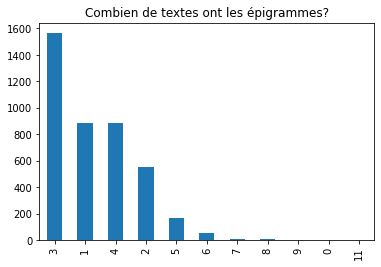

In [20]:
data_from_API_df['texts'].value_counts().plot(kind='bar', title="Combien de textes ont les épigrammes?")